In [12]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import lines
import matplotlib.cm as cm
import tqdm
from tqdm.notebook import tqdm as tqdm
import multiprocessing as mproc
import os

import model_opt
import data_generate
import algo_GD

_t_max =1000
_cmap = plt.cm.jet
w_init = [5,5]

In [16]:
_t_max = 10000
w_init= [2,2]
loss_transition = []
f_store=[]

f = model_opt.RosenBrock(err = 1)
algo = algo_GD.SGD(w_init=w_init,t_max=_t_max,a=0.0009)

In [17]:
# updateを行うたびに異なるノイズが加えられる
for i in tqdm(algo):
    loss_transition.append(np.sum((f.w_star - algo.w) ** 2))
    f_store.append(f.f_opt(algo.w))
    algo.update(model=f)

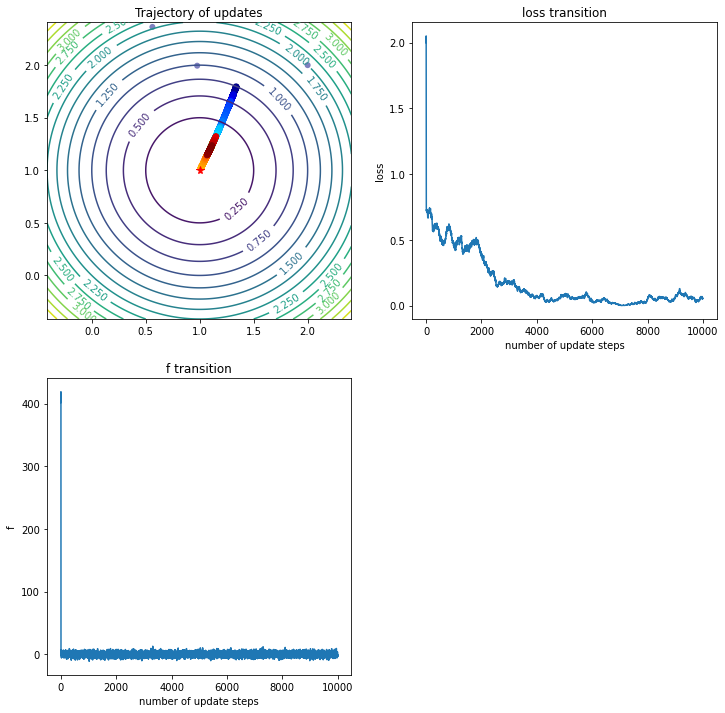

In [18]:
w_store = np.array(algo.wstore)
# 目的関数の真の値
w_star = f.w_star

# 等高線描画用
def circle(x, y,w):
    return (x-w) ** 2 + (y-w) ** 2

# wの軌跡
tmpdel = np.linalg.norm(w_star-w_init)
xvals = np.arange(w_star[0]-tmpdel, w_star[0]+tmpdel, 0.01)
yvals = np.arange(w_star[1]-tmpdel, w_star[1]+tmpdel, 0.01)
x1, x2 = np.meshgrid(xvals, yvals)
Z = circle(x1, x2,w_star[0])
myfig = plt.figure(figsize=(12,12))

ax1 = myfig.add_subplot(2,2,1)
plt.title("Trajectory of updates")
CS = ax1.contour(x1, x2, Z, levels=15)
c = np.linspace(0, _t_max, len(w_store))
ax1.scatter(w_store.T[0],w_store.T[1],c=c,cmap = _cmap,linewidths=0.01,alpha=0.5)
ax1.plot(*w_star, 'r*', markersize=8)
CS.clabel(inline=1, fontsize=10)


# 真の値とtステップ目のwとの２乗誤差の推移
ax2 = myfig.add_subplot(2,2,2)
plt.title("loss transition")
plt.xlabel('number of update steps')
plt.ylabel('loss')
ax2.plot(list(range(_t_max)),loss_transition)

# 関数値の推移
ax2 = myfig.add_subplot(2,2,3)
plt.title("f transition")
plt.xlabel('number of update steps')
plt.ylabel('f')
ax2.plot(list(range(_t_max)),f_store)